# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [7]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Preliminary Data Exploration

# Check shape and column names for each dataset
datasets = {
    "Household Income": df_hh_income,
    "Poverty Rate": df_pct_poverty,
    "High School Completion": df_pct_completed_hs,
    "Race Share": df_share_race_city,
    "Fatalities": df_fatalities
}

for name, df in datasets.items():
    print(f"📊 {name}")
    print(f"Shape: {df.shape}")  # rows, columns
    print(f"Columns: {list(df.columns)}")
    print("-" * 80)


📊 Household Income
Shape: (29322, 3)
Columns: ['Geographic Area', 'City', 'Median Income']
--------------------------------------------------------------------------------
📊 Poverty Rate
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'poverty_rate']
--------------------------------------------------------------------------------
📊 High School Completion
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'percent_completed_hs']
--------------------------------------------------------------------------------
📊 Race Share
Shape: (29268, 7)
Columns: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
--------------------------------------------------------------------------------
📊 Fatalities
Shape: (2535, 14)
Columns: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
----------------------------------------

In [ ]:
# Check for NaN values in each dataset
for name, df in datasets.items():
    print(f"🧩 Missing values in {name}:")
    print(df.isnull().sum())
    print("-" * 80)


🧩 Missing values in Household Income:
Geographic Area     0
City                0
Median Income      51
dtype: int64
--------------------------------------------------------------------------------
🧩 Missing values in Poverty Rate:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
--------------------------------------------------------------------------------
🧩 Missing values in High School Completion:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
--------------------------------------------------------------------------------
🧩 Missing values in Race Share:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
--------------------------------------------------------------------------------
🧩 Missing values in Fatalities:
id                           0
name             

In [ ]:
# Check for duplicate rows
for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f"🔁 {name}: {duplicates} duplicate rows")


🔁 Household Income: 0 duplicate rows
🔁 Poverty Rate: 0 duplicate rows
🔁 High School Completion: 0 duplicate rows
🔁 Race Share: 0 duplicate rows
🔁 Fatalities: 0 duplicate rows


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [12]:
# Data Cleaning - Check for Missing Values and Duplicates

# Display number and percentage of missing values for each column
for name, df in datasets.items():
    print(f"🧩 {name}")
    missing = df.isnull().sum()
    percent_missing = (missing / len(df)) * 100
    print(pd.DataFrame({'Missing Values': missing, 'Percent (%)': percent_missing}))
    print("-" * 90)


🧩 Household Income
                 Missing Values  Percent (%)
Geographic Area               0         0.00
City                          0         0.00
Median Income                51         0.17
------------------------------------------------------------------------------------------
🧩 Poverty Rate
                 Missing Values  Percent (%)
Geographic Area               0         0.00
City                          0         0.00
poverty_rate                  0         0.00
------------------------------------------------------------------------------------------
🧩 High School Completion
                      Missing Values  Percent (%)
Geographic Area                    0         0.00
City                               0         0.00
percent_completed_hs               0         0.00
------------------------------------------------------------------------------------------
🧩 Race Share
                       Missing Values  Percent (%)
Geographic area                     0       

In [13]:
# Fill NaN values with 0 or 'Unknown' depending on the column type

df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)

# For fatalities, fill missing with descriptive placeholders
df_fatalities['race'].fillna('Unknown', inplace=True)
df_fatalities['armed'].fillna('Unknown', inplace=True)
df_fatalities['age'].fillna(0, inplace=True)

print("✅ NaN values handled (numeric = 0, categorical = 'Unknown')")


✅ NaN values handled (numeric = 0, categorical = 'Unknown')


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\3903021000.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fatalities['race'].fillna('Unknown', inplace=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_8392\3903021000.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [14]:
# Remove any duplicate rows from all datasets
for name, df in datasets.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"🔁 {name}: Removed {before - after} duplicate rows")

print("✅ Duplicate removal complete.")


🔁 Household Income: Removed 0 duplicate rows
🔁 Poverty Rate: Removed 0 duplicate rows
🔁 High School Completion: Removed 0 duplicate rows
🔁 Race Share: Removed 0 duplicate rows
🔁 Fatalities: Removed 0 duplicate rows
✅ Duplicate removal complete.


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [16]:
# Clean and Prepare Poverty Rate Data by State

# Ensure poverty_rate is numeric (remove non-numeric characters)
df_pct_poverty["poverty_rate"] = (
    df_pct_poverty["poverty_rate"]
    .astype(str)                                  # force text
    .str.replace("[^0-9.\-]", "", regex=True)     # remove non-numeric chars
)

# Convert to float
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")

# Group by state and get mean
poverty_by_state = (
    df_pct_poverty
    .groupby("Geographic Area", as_index=False)["poverty_rate"]
    .mean()
    .sort_values(by="poverty_rate", ascending=False)
)

# Check quick preview
display(poverty_by_state.head(5))
display(poverty_by_state.tail(5))


,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96


,Geographic Area,poverty_rate
20,MD,10.31
50,WY,9.89
19,MA,9.59
6,CT,9.14
31,NJ,8.19


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\416890530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


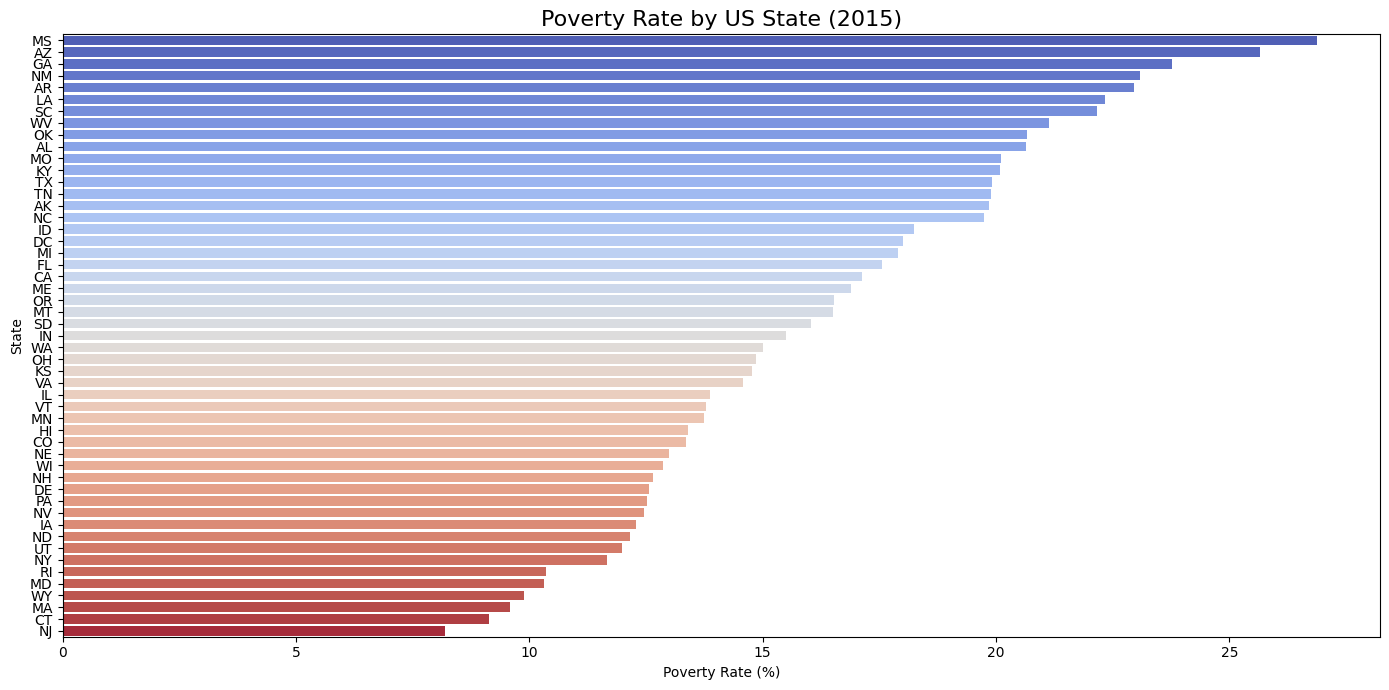

🏆 Highest poverty rate: MS (26.88%)
💰 Lowest poverty rate: NJ (8.19%)


In [17]:
# Bar Chart: Poverty Rate by US State

plt.figure(figsize=(14, 7))
sns.barplot(
    x="poverty_rate",
    y="Geographic Area",
    data=poverty_by_state,
    palette="coolwarm"
)

plt.title("Poverty Rate by US State (2015)", fontsize=16)
plt.xlabel("Poverty Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Identify highest and lowest
highest_state = poverty_by_state.iloc[0]
lowest_state = poverty_by_state.iloc[-1]

print(f"🏆 Highest poverty rate: {highest_state['Geographic Area']} ({highest_state['poverty_rate']:.2f}%)")
print(f"💰 Lowest poverty rate: {lowest_state['Geographic Area']} ({lowest_state['poverty_rate']:.2f}%)")


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

C:\Users\angel\AppData\Local\Temp\ipykernel_8392\1885004635.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


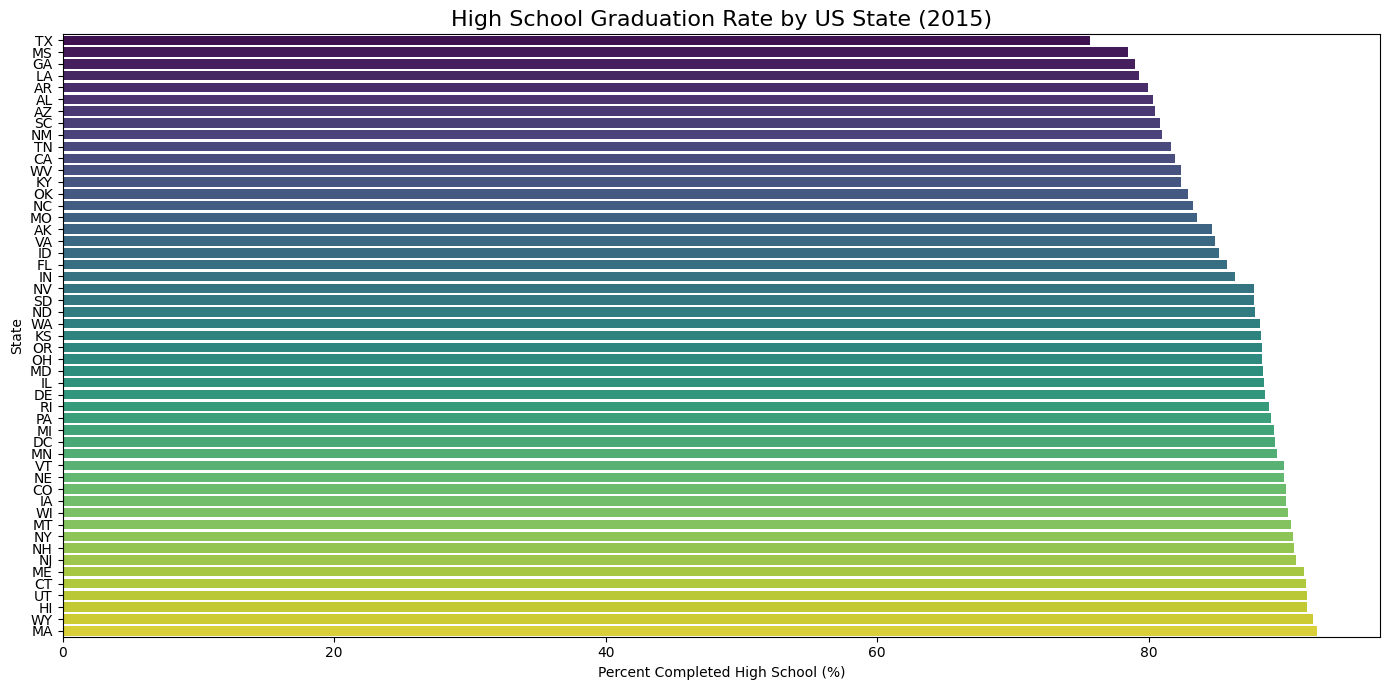

📉 Lowest HS graduation rate: TX (75.69%)
📈 Highest HS graduation rate: MA (92.40%)


In [18]:
# Chart: High School Graduation Rate by State

# Clean the percent_completed_hs column similarly (if needed)
df_pct_completed_hs["percent_completed_hs"] = (
    df_pct_completed_hs["percent_completed_hs"]
    .astype(str)
    .str.replace("[^0-9.\-]", "", regex=True)
)
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(
    df_pct_completed_hs["percent_completed_hs"], errors="coerce"
)

# Group by state, average the graduation rate, then sort in ascending order
hs_by_state = (
    df_pct_completed_hs
    .groupby("Geographic Area", as_index=False)["percent_completed_hs"]
    .mean()
    .sort_values(by="percent_completed_hs", ascending=True)
)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    x="percent_completed_hs",
    y="Geographic Area",
    data=hs_by_state,
    palette="viridis"
)
plt.title("High School Graduation Rate by US State (2015)", fontsize=16)
plt.xlabel("Percent Completed High School (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Print lowest and highest
lowest = hs_by_state.iloc[0]
highest = hs_by_state.iloc[-1]
print(f"📉 Lowest HS graduation rate: {lowest['Geographic Area']} ({lowest['percent_completed_hs']:.2f}%)")
print(f"📈 Highest HS graduation rate: {highest['Geographic Area']} ({highest['percent_completed_hs']:.2f}%)")


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [19]:
# Prepare merged dataset: Poverty Rate vs High School Graduation Rate

# Clean and convert numeric columns if needed
df_pct_poverty["poverty_rate"] = (
    df_pct_poverty["poverty_rate"]
    .astype(str)
    .str.replace("[^0-9.\-]", "", regex=True)
)
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")

df_pct_completed_hs["percent_completed_hs"] = (
    df_pct_completed_hs["percent_completed_hs"]
    .astype(str)
    .str.replace("[^0-9.\-]", "", regex=True)
)
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")

# Group by state
poverty_by_state = (
    df_pct_poverty.groupby("Geographic Area", as_index=False)["poverty_rate"]
    .mean()
)
hs_by_state = (
    df_pct_completed_hs.groupby("Geographic Area", as_index=False)["percent_completed_hs"]
    .mean()
)

# Merge the two datasets on state name
merged_df = pd.merge(poverty_by_state, hs_by_state, on="Geographic Area")
merged_df.sort_values("poverty_rate", ascending=False, inplace=True)

# Preview
display(merged_df.head())


,Geographic Area,poverty_rate,percent_completed_hs
25,MS,26.88,78.47
3,AZ,25.67,80.47
10,GA,23.78,79.01
32,NM,23.08,80.98
2,AR,22.96,79.95


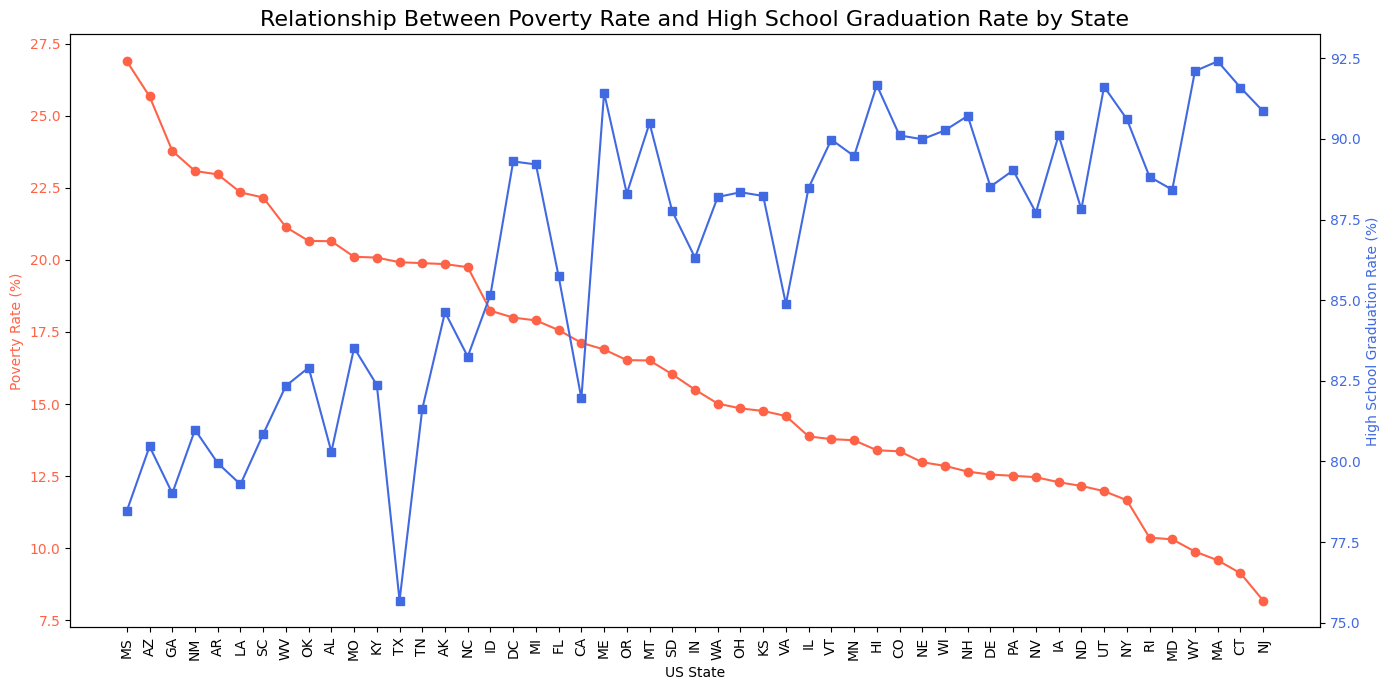

In [20]:
# Visualize Relationship between Poverty Rate and High School Graduation Rate

fig, ax1 = plt.subplots(figsize=(14, 7))

# Primary y-axis (left) — Poverty Rate
ax1.plot(
    merged_df["Geographic Area"],
    merged_df["poverty_rate"],
    color="tomato",
    marker="o",
    label="Poverty Rate (%)"
)
ax1.set_xlabel("US State")
ax1.set_ylabel("Poverty Rate (%)", color="tomato")
ax1.tick_params(axis="y", labelcolor="tomato")
plt.xticks(rotation=90)

# Secondary y-axis (right) — High School Graduation Rate
ax2 = ax1.twinx()
ax2.plot(
    merged_df["Geographic Area"],
    merged_df["percent_completed_hs"],
    color="royalblue",
    marker="s",
    label="High School Graduation Rate (%)"
)
ax2.set_ylabel("High School Graduation Rate (%)", color="royalblue")
ax2.tick_params(axis="y", labelcolor="royalblue")

# Title and layout
plt.title("Relationship Between Poverty Rate and High School Graduation Rate by State", fontsize=16)
plt.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [21]:
# Prepare the data for Seaborn jointplot

# Ensure both columns are numeric
merged_df["poverty_rate"] = pd.to_numeric(merged_df["poverty_rate"], errors="coerce")
merged_df["percent_completed_hs"] = pd.to_numeric(merged_df["percent_completed_hs"], errors="coerce")

# Drop any NaN values just in case
merged_clean = merged_df.dropna(subset=["poverty_rate", "percent_completed_hs"])

# Quick sanity check
print(f"✅ Clean dataset for plotting: {merged_clean.shape[0]} states, {merged_clean.shape[1]} columns")
display(merged_clean.head())


✅ Clean dataset for plotting: 51 states, 3 columns


,Geographic Area,poverty_rate,percent_completed_hs
25,MS,26.88,78.47
3,AZ,25.67,80.47
10,GA,23.78,79.01
32,NM,23.08,80.98
2,AR,22.96,79.95


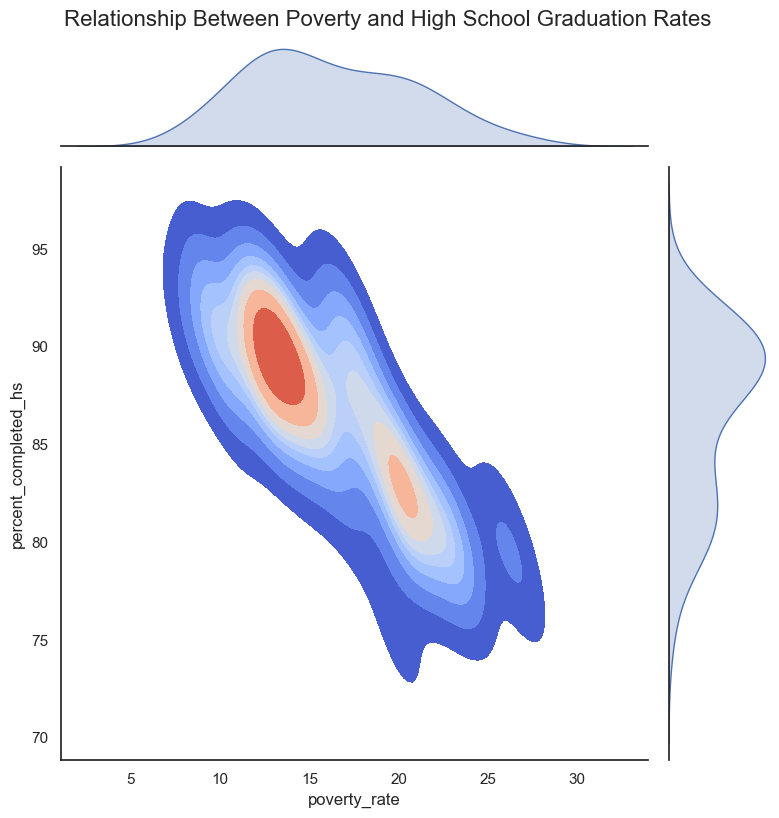

In [22]:
# Visualize the relationship using Seaborn jointplot (scatter + KDE)

sns.set(style="white", color_codes=True)
g = sns.jointplot(
    x="poverty_rate",
    y="percent_completed_hs",
    data=merged_clean,
    kind="kde",          # try 'scatter', 'reg', or 'kde'
    fill=True,
    cmap="coolwarm",
    height=8
)

# Add title
plt.suptitle("Relationship Between Poverty and High School Graduation Rates", fontsize=16, y=1.02)
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

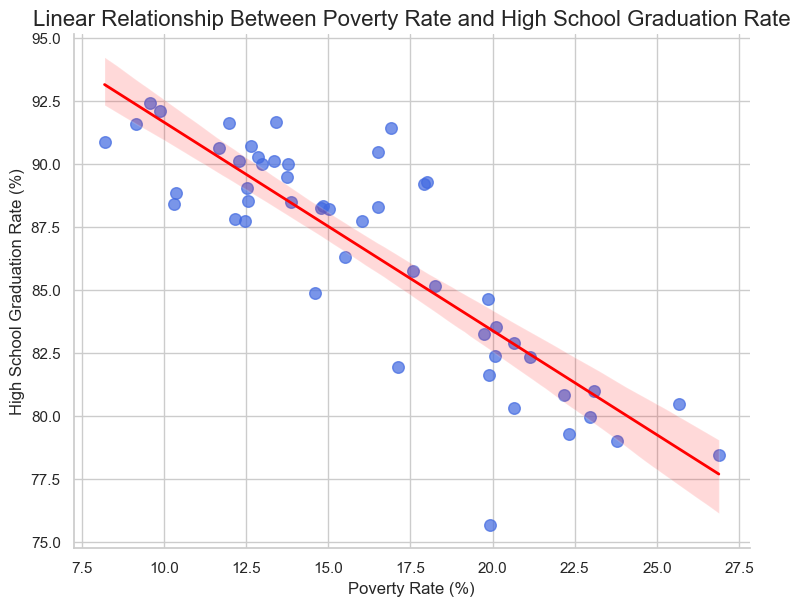

In [23]:
# Visualize linear relationship using Seaborn lmplot (regression)

sns.set(style="whitegrid")

sns.lmplot(
    x="poverty_rate",
    y="percent_completed_hs",
    data=merged_clean,
    height=6,
    aspect=1.3,
    scatter_kws={"s": 70, "alpha": 0.7, "color": "royalblue"},
    line_kws={"color": "red", "lw": 2}
)

plt.title("Linear Relationship Between Poverty Rate and High School Graduation Rate", fontsize=16)
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [24]:
# Prepare and clean racial composition data by US state

# Clean numeric columns
race_cols = ["share_white", "share_black", "share_hispanic", "share_asian", "share_native_american"]

for col in race_cols:
    df_share_race_city[col] = (
        df_share_race_city[col]
        .astype(str)
        .str.replace("[^0-9.\-]", "", regex=True)
    )
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors="coerce")

# Group by state and average the percentages
race_by_state = (
    df_share_race_city.groupby("Geographic area", as_index=False)[race_cols]
    .mean()
    .sort_values(by="share_white", ascending=False)
)

# Preview
display(race_by_state.head())


,Geographic area,share_white,share_black,share_hispanic,share_asian,share_native_american
12,IA,96.71,0.56,2.82,0.40,0.27
46,VT,95.87,0.77,1.38,0.91,0.37
21,ME,95.69,0.82,1.31,1.03,0.55
30,NH,95.68,0.72,1.74,1.34,0.29
49,WV,95.04,2.92,0.90,0.34,0.20


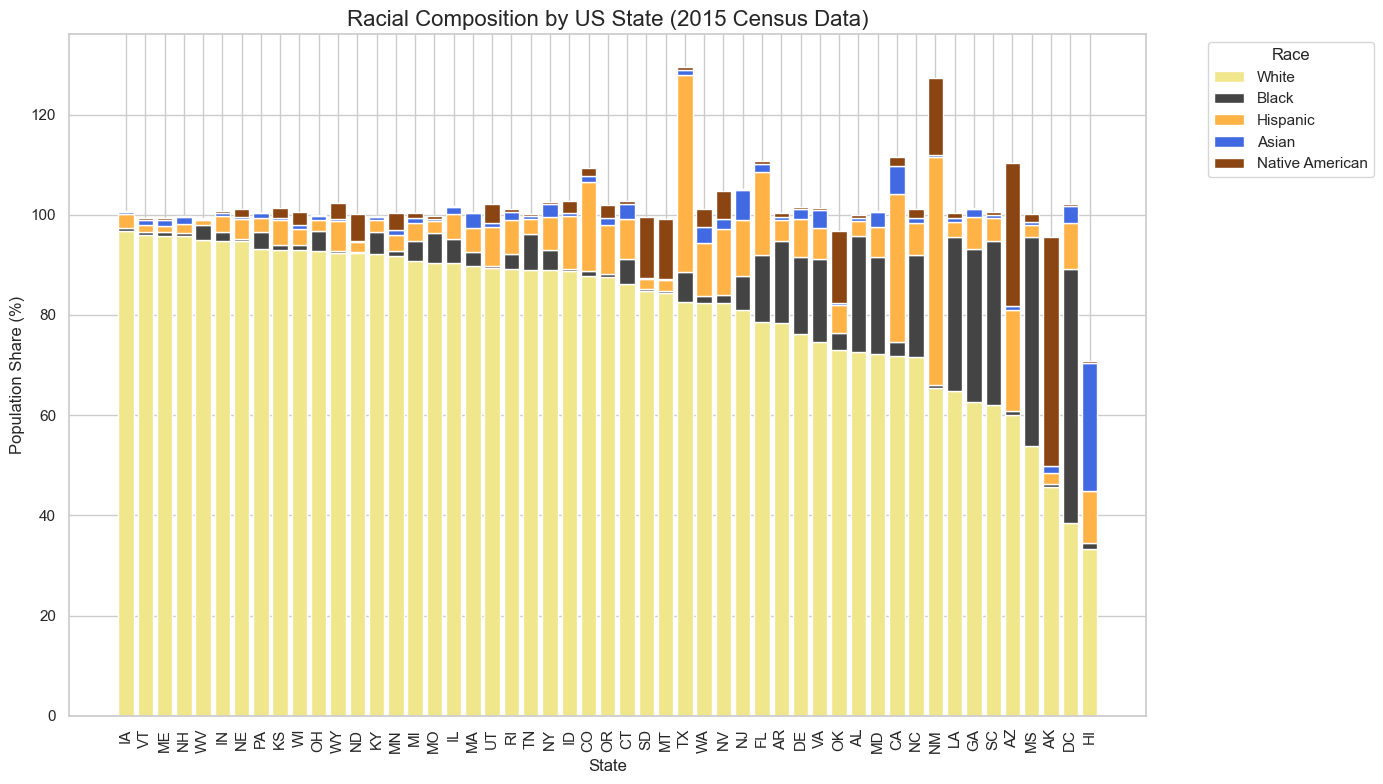

In [25]:
# Create stacked bar chart of racial composition per state

# Set up figure
plt.figure(figsize=(14, 8))

# Create stacked bars for each racial group
bottom = np.zeros(len(race_by_state))
colors = ["#f0e68c", "#444444", "#ffb347", "#4169e1", "#8b4513"]
labels = ["White", "Black", "Hispanic", "Asian", "Native American"]

for col, color, label in zip(race_cols, colors, labels):
    plt.bar(
        race_by_state["Geographic area"],
        race_by_state[col],
        bottom=bottom,
        color=color,
        label=label
    )
    bottom += race_by_state[col].fillna(0).values

plt.title("Racial Composition by US State (2015 Census Data)", fontsize=16)
plt.xlabel("State")
plt.ylabel("Population Share (%)")
plt.xticks(rotation=90)
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [26]:
# Prepare data: count fatalities by race

# Clean and handle missing values in 'race'
df_fatalities["race"] = df_fatalities["race"].fillna("Unknown")

# Count occurrences per race
race_counts = df_fatalities["race"].value_counts().reset_index()
race_counts.columns = ["Race", "Count"]

# Quick preview
display(race_counts)


,Race,Count
0,W,1201
1,B,618
2,H,423
3,Unknown,195
4,A,39
5,N,31
6,O,28


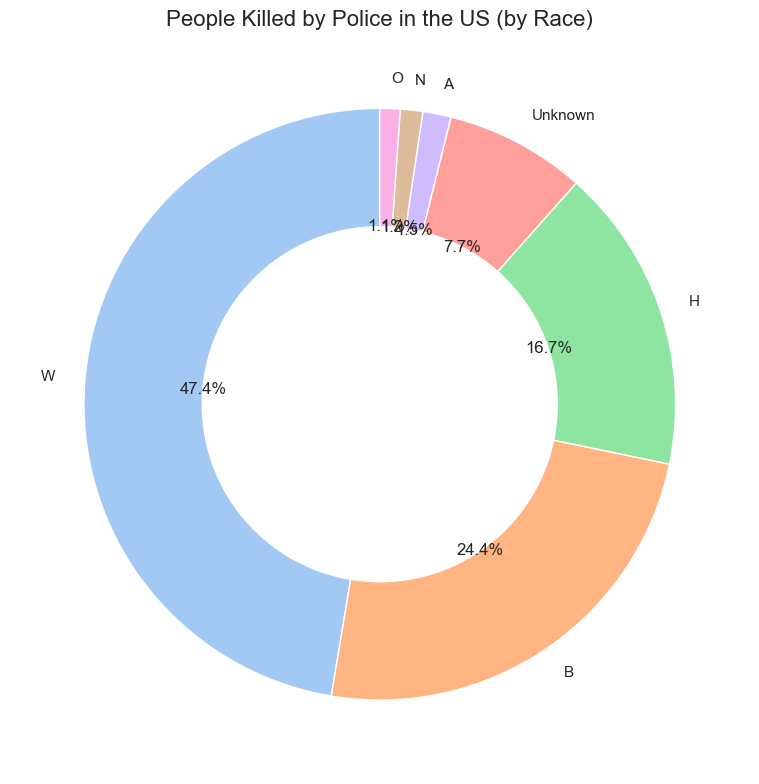

In [27]:
# Donut chart for fatalities by race

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")[0:len(race_counts)]

# Create pie chart with hole
plt.pie(
    race_counts["Count"],
    labels=race_counts["Race"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"width": 0.4, "edgecolor": "white"}
)

plt.title("People Killed by Police in the US (by Race)", fontsize=16)
plt.tight_layout()
plt.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [28]:
# Prepare gender-based fatalities data

# Clean and standardize gender column
df_fatalities["gender"] = df_fatalities["gender"].fillna("Unknown").str.title()

# Count occurrences of each gender
gender_counts = df_fatalities["gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]

# Preview the data
display(gender_counts)


,Gender,Count
0,M,2428
1,F,107


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\1821726195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\angel\AppData\Local\Temp\ipykernel_8392\1821726195.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(


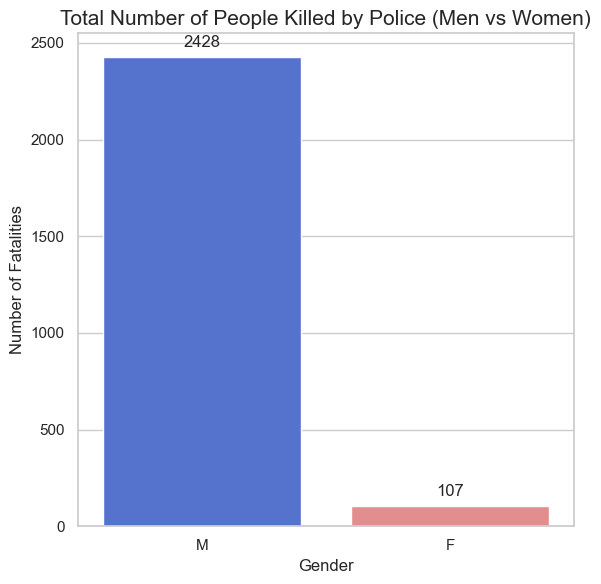

In [29]:
# Bar chart comparing total deaths of men and women

plt.figure(figsize=(6, 6))
sns.barplot(
    x="Gender",
    y="Count",
    data=gender_counts,
    palette=["royalblue", "lightcoral", "gray"]
)

plt.title("Total Number of People Killed by Police (Men vs Women)", fontsize=15)
plt.ylabel("Number of Fatalities")
plt.xlabel("Gender")

# Annotate bars with counts
for index, value in enumerate(gender_counts["Count"]):
    plt.text(index, value + 50, str(int(value)), ha="center", fontsize=12)

plt.tight_layout()
plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [30]:
# Prepare and clean data for box plot analysis

# Fill missing values
df_fatalities["age"] = pd.to_numeric(df_fatalities["age"], errors="coerce")
df_fatalities["gender"] = df_fatalities["gender"].fillna("Unknown").str.title()
df_fatalities["manner_of_death"] = df_fatalities["manner_of_death"].fillna("Unknown").str.title()

# Drop rows where age is missing (not useful for box plots)
df_box = df_fatalities.dropna(subset=["age"])

# Quick preview
display(df_box[["age", "gender", "manner_of_death"]].head())


,age,gender,manner_of_death
0,53.00,M,Shot
1,47.00,M,Shot
2,23.00,M,Shot And Tasered
3,32.00,M,Shot
4,39.00,M,Shot


In [31]:
# Quick statistical summary by gender and manner of death

summary_stats = df_box.groupby(["gender", "manner_of_death"])["age"].describe()
display(summary_stats)


count  mean   std   min   25%   50%   75%   max
gender manner_of_death                                                    
F      Shot               102.00 35.54 14.19  0.00 25.00 35.00 45.75 71.00
       Shot And Tasered     5.00 35.60 13.85 17.00 30.00 37.00 39.00 55.00
M      Shot             2,261.00 35.44 14.37  0.00 25.00 34.00 45.00 91.00
       Shot And Tasered   167.00 36.18 13.34  0.00 27.00 35.00 46.00 76.00

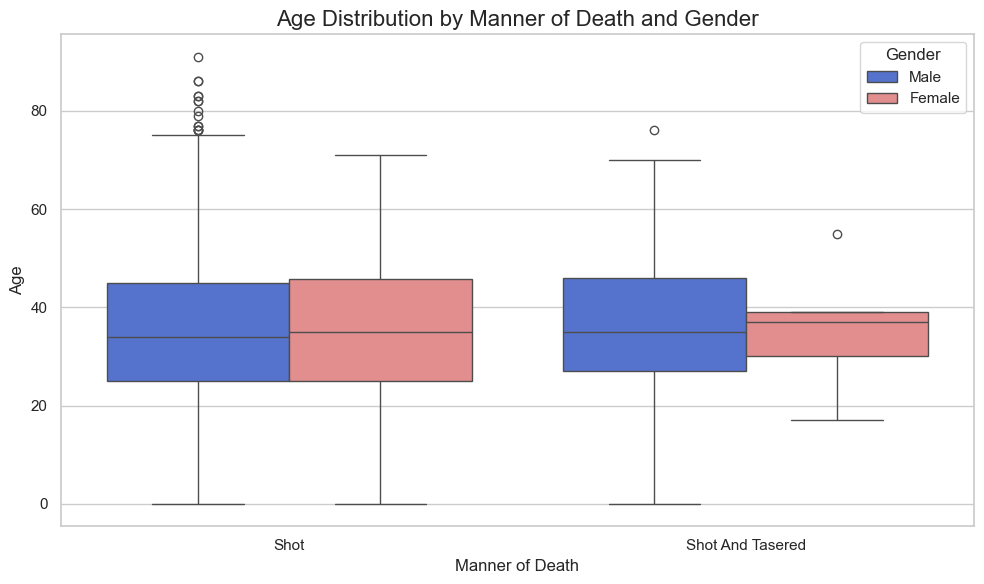

In [33]:
# Normalize gender abbreviations before plotting
df_box["gender"] = (
    df_box["gender"]
    .replace({"M": "Male", "F": "Female", "m": "Male", "f": "Female"})
    .fillna("Unknown")
)

# Box Plot: Age vs Manner of Death, broken out by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="manner_of_death",
    y="age",
    hue="gender",
    data=df_box,
    palette={"Male": "royalblue", "Female": "lightcoral", "Unknown": "gray"}
)

plt.title("Age Distribution by Manner of Death and Gender", fontsize=16)
plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [34]:
# Clean and prepare 'armed' data

# Fill missing values and normalize text
df_fatalities["armed"] = df_fatalities["armed"].fillna("Unknown").str.title()

# Count total cases and those armed/unarmed
armed_counts = df_fatalities["armed"].value_counts().reset_index()
armed_counts.columns = ["Weapon", "Count"]

# Separate summary info
total_cases = df_fatalities.shape[0]
armed_cases = df_fatalities[df_fatalities["armed"].str.contains("Gun|Rifle|Weapon|Knife|Sword|Axe|Machete|Hammer|Crossbow", case=False, na=False)].shape[0]
unarmed_cases = df_fatalities[df_fatalities["armed"].str.contains("Unarmed", case=False, na=False)].shape[0]

armed_percent = (armed_cases / total_cases) * 100
unarmed_percent = (unarmed_cases / total_cases) * 100

print(f"🔫 Armed: {armed_cases} ({armed_percent:.2f}%)")
print(f"🙌 Unarmed: {unarmed_cases} ({unarmed_percent:.2f}%)")
print(f"📊 Total records analyzed: {total_cases}")


🔫 Armed: 1947 (76.80%)
🙌 Unarmed: 171 (6.75%)
📊 Total records analyzed: 2535


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\1574202833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


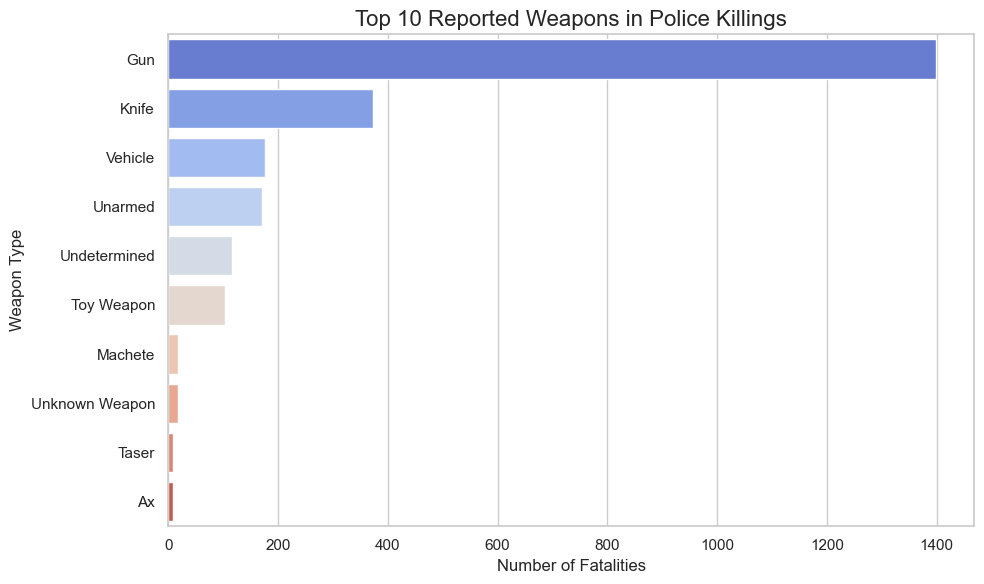

In [35]:
# Identify and visualize top 10 weapons listed

top_weapons = armed_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Count",
    y="Weapon",
    data=top_weapons,
    palette="coolwarm"
)

plt.title("Top 10 Reported Weapons in Police Killings", fontsize=16)
plt.xlabel("Number of Fatalities")
plt.ylabel("Weapon Type")
plt.tight_layout()
plt.show()


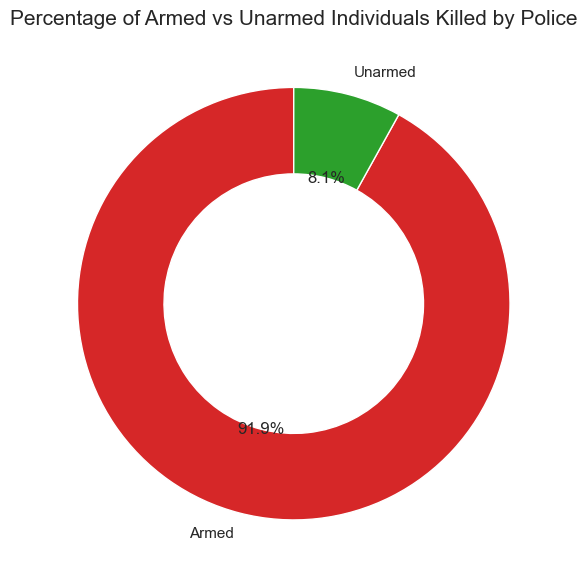

In [36]:
# Donut chart showing armed vs unarmed percentage

armed_status = pd.Series(
    ["Armed"] * armed_cases + ["Unarmed"] * unarmed_cases
).value_counts().reset_index()
armed_status.columns = ["Status", "Count"]

plt.figure(figsize=(6, 6))
colors = ["#d62728", "#2ca02c"]

plt.pie(
    armed_status["Count"],
    labels=armed_status["Status"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"width": 0.4, "edgecolor": "white"}
)

plt.title("Percentage of Armed vs Unarmed Individuals Killed by Police", fontsize=15)
plt.tight_layout()
plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [37]:
# Calculate what percentage of people killed were under 25 years old

# Clean and convert 'age' to numeric
df_fatalities["age"] = pd.to_numeric(df_fatalities["age"], errors="coerce")

# Drop missing ages
df_age = df_fatalities.dropna(subset=["age"])

# Calculate totals
total_killed = df_age.shape[0]
under_25 = df_age[df_age["age"] < 25].shape[0]
under_25_percent = (under_25 / total_killed) * 100

print(f"🧍‍♂️ Total people with known age: {total_killed}")
print(f"👶 Under 25 years old: {under_25} ({under_25_percent:.2f}%)")


🧍‍♂️ Total people with known age: 2535
👶 Under 25 years old: 527 (20.79%)


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

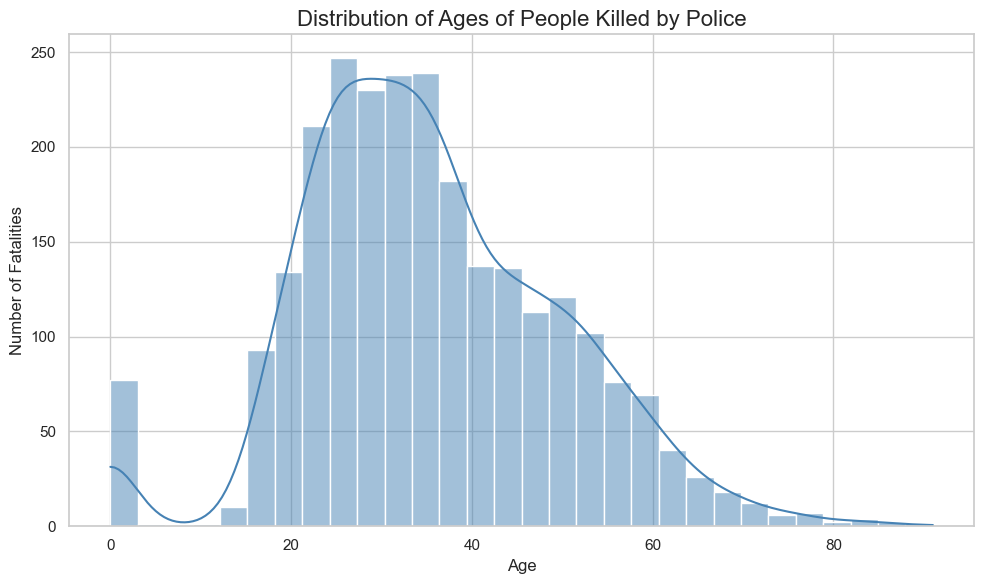

In [38]:
# Histogram + KDE plot of age distribution

plt.figure(figsize=(10, 6))
sns.histplot(
    df_age["age"],
    bins=30,
    kde=True,
    color="steelblue",
    edgecolor="white"
)

plt.title("Distribution of Ages of People Killed by Police", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

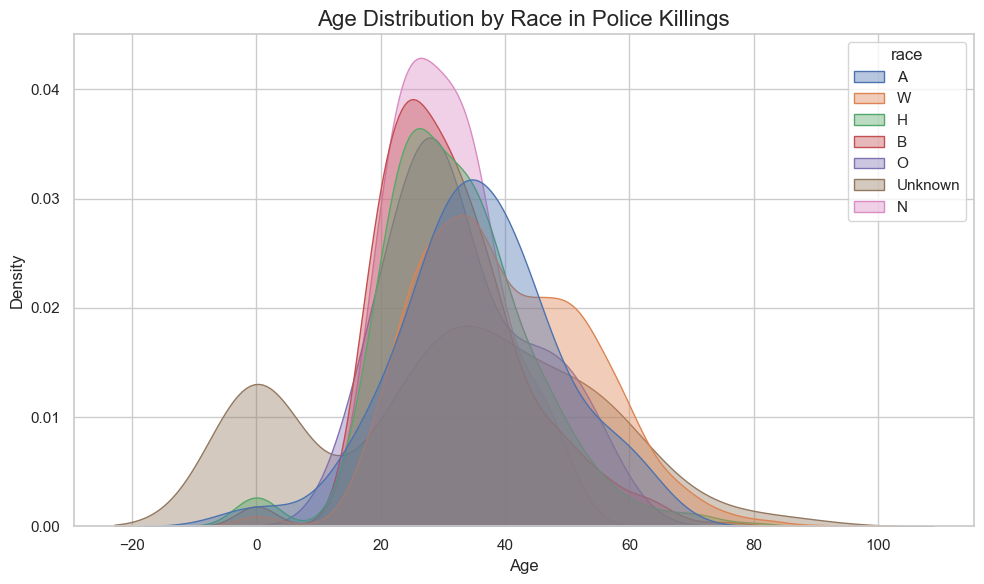

In [39]:
# KDE plot by race to compare age distributions

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_age,
    x="age",
    hue="race",
    common_norm=False,
    fill=True,
    alpha=0.4
)

plt.title("Age Distribution by Race in Police Killings", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [40]:
# Prepare data: total people killed by race

# Clean missing values and standardize race labels
df_fatalities["race"] = df_fatalities["race"].fillna("Unknown").str.title()

# Count fatalities per race
race_deaths = df_fatalities["race"].value_counts().reset_index()
race_deaths.columns = ["Race", "Count"]

# Preview results
display(race_deaths)


,Race,Count
0,W,1201
1,B,618
2,H,423
3,Unknown,195
4,A,39
5,N,31
6,O,28


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\3636002059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


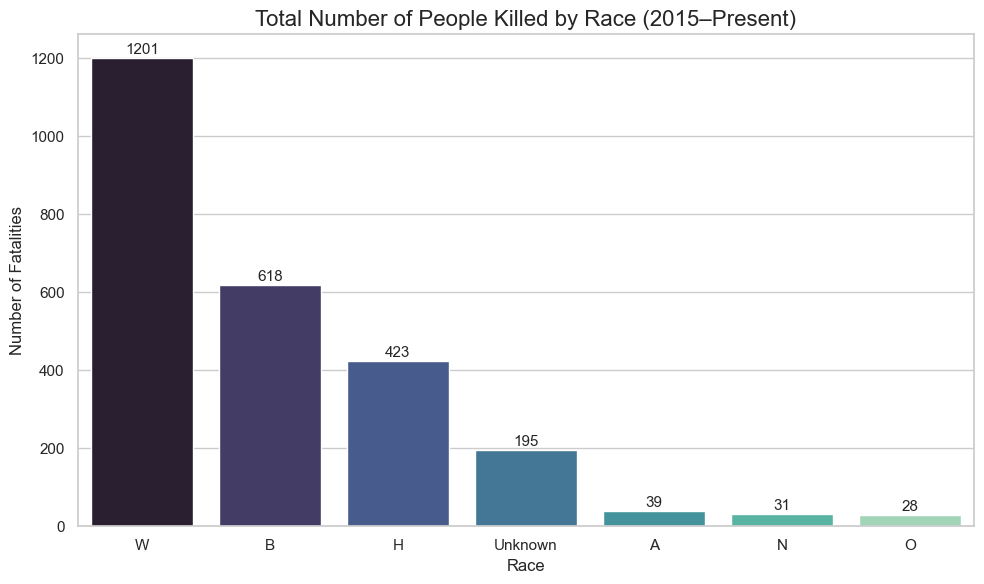

In [41]:
# Bar chart showing total number of people killed by race

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Race",
    y="Count",
    data=race_deaths,
    palette="mako"
)

plt.title("Total Number of People Killed by Race (2015–Present)", fontsize=16)
plt.xlabel("Race")
plt.ylabel("Number of Fatalities")

# Annotate bars with counts
for index, value in enumerate(race_deaths["Count"]):
    plt.text(index, value + 10, str(int(value)), ha="center", fontsize=11)

plt.tight_layout()
plt.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [42]:
# Calculate the percentage of people killed who had signs of mental illness

# Clean and standardize the column
df_fatalities["signs_of_mental_illness"] = df_fatalities["signs_of_mental_illness"].astype(str).str.title()

# Count total cases and those with mental illness
total_cases = df_fatalities.shape[0]
mental_cases = df_fatalities[df_fatalities["signs_of_mental_illness"] == "True"].shape[0]
mental_percent = (mental_cases / total_cases) * 100

print(f"🧠 Total cases analyzed: {total_cases}")
print(f"💭 People showing signs of mental illness: {mental_cases} ({mental_percent:.2f}%)")


🧠 Total cases analyzed: 2535
💭 People showing signs of mental illness: 633 (24.97%)


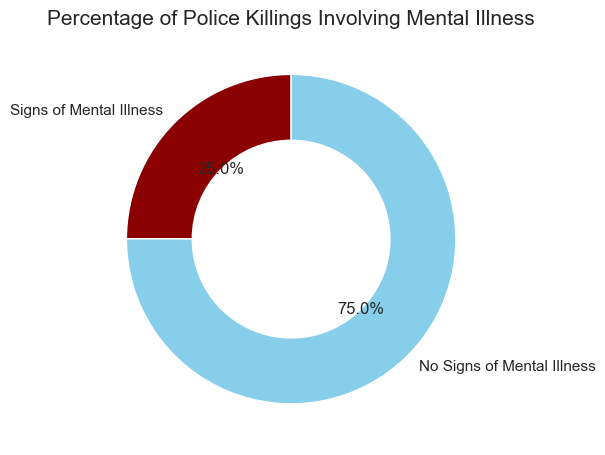

In [43]:
# Visualize percentage of police killings involving mental illness

plt.figure(figsize=(6, 6))

labels = ["Signs of Mental Illness", "No Signs of Mental Illness"]
sizes = [mental_cases, total_cases - mental_cases]
colors = ["#8b0000", "#87ceeb"]

plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"width": 0.4, "edgecolor": "white"}
)

plt.title("Percentage of Police Killings Involving Mental Illness", fontsize=15)
plt.tight_layout()
plt.show()


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [44]:
# Find the top 10 cities with the most police killings

# Clean and standardize city names
df_fatalities["city"] = df_fatalities["city"].astype(str).str.title()

# Count number of killings per city
city_killings = df_fatalities["city"].value_counts().reset_index()
city_killings.columns = ["City", "Count"]

# Get the top 10 cities
top10_cities = city_killings.head(10)

# Preview results
display(top10_cities)


,City,Count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\2371202629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


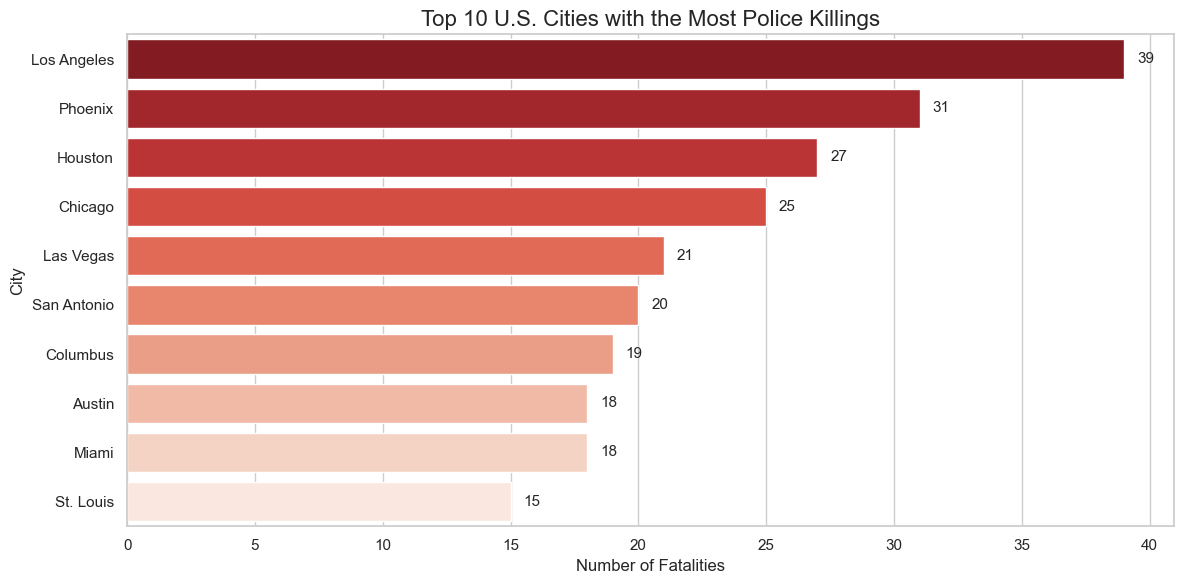

In [45]:
# Bar chart of the top 10 cities with the most police killings

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Count",
    y="City",
    data=top10_cities,
    palette="Reds_r"
)

plt.title("Top 10 U.S. Cities with the Most Police Killings", fontsize=16)
plt.xlabel("Number of Fatalities")
plt.ylabel("City")

# Annotate bars with counts
for index, value in enumerate(top10_cities["Count"]):
    plt.text(value + 0.5, index, str(int(value)), va="center", fontsize=11)

plt.tight_layout()
plt.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [46]:
# Find racial breakdown of deaths in top 10 cities

# Clean columns
df_fatalities["race"] = df_fatalities["race"].fillna("Unknown").str.title()
df_fatalities["city"] = df_fatalities["city"].astype(str).str.title()

# Get top 10 cities by total deaths
top10_cities = (
    df_fatalities["city"].value_counts().head(10).index.tolist()
)

# Filter only those cities
df_top10 = df_fatalities[df_fatalities["city"].isin(top10_cities)]

# Group by city and race to count deaths
deaths_by_race_city = (
    df_top10.groupby(["city", "race"])
    .size()
    .reset_index(name="death_count")
)

# Pivot to show races as columns
deaths_pivot = deaths_by_race_city.pivot(index="city", columns="race", values="death_count").fillna(0)
deaths_pivot["Total_Deaths"] = deaths_pivot.sum(axis=1)

# Display table
display(deaths_pivot.head(10))


race,A,B,H,N,O,Unknown,W,Total_Deaths
city,,,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,0.00,13.00,18.00
Chicago,0.00,21.00,1.00,0.00,0.00,1.00,2.00,25.00
Columbus,0.00,11.00,0.00,0.00,1.00,1.00,6.00,19.00
Houston,1.00,15.00,6.00,1.00,0.00,1.00,3.00,27.00
Las Vegas,0.00,3.00,5.00,0.00,0.00,4.00,9.00,21.00
Los Angeles,1.00,10.00,19.00,0.00,0.00,3.00,6.00,39.00
Miami,0.00,8.00,6.00,0.00,0.00,1.00,3.00,18.00
Phoenix,0.00,2.00,11.00,3.00,0.00,3.00,12.00,31.00
San Antonio,0.00,3.00,12.00,0.00,0.00,2.00,3.00,20.00


In [47]:
# Merge deaths with population race share to estimate rate per racial group

# Clean city names in population dataset to match
df_share_race_city["City"] = df_share_race_city["City"].astype(str).str.title()

# Select only top 10 cities and relevant race share columns
race_cols = ["share_white", "share_black", "share_hispanic", "share_asian", "share_native_american"]
df_city_share = df_share_race_city[df_share_race_city["City"].isin(top10_cities)][["City"] + race_cols]

# Merge datasets
merged_race_rate = pd.merge(deaths_pivot.reset_index(), df_city_share, left_on="city", right_on="City", how="left")

# Calculate simple ratio (deaths per share of population)
for race_col in race_cols:
    race_name = race_col.replace("share_", "").replace("_", " ").title()
    if race_name in merged_race_rate.columns:
        merged_race_rate[f"{race_name}_Rate"] = merged_race_rate[race_name] / merged_race_rate[race_col]

# Sort and display
display(merged_race_rate.head(10))


,city,A,B,H,N,O,Unknown,W,Total_Deaths,City,share_white,share_black,share_hispanic,share_asian,share_native_american
0,Austin,0.00,3.00,2.00,0.00,0.00,0.00,13.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Chicago,0.00,21.00,1.00,0.00,0.00,1.00,2.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Columbus,0.00,11.00,0.00,0.00,1.00,1.00,6.00,19.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Houston,1.00,15.00,6.00,1.00,0.00,1.00,3.00,27.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Las Vegas,0.00,3.00,5.00,0.00,0.00,4.00,9.00,21.00,NaN,NaN,NaN,NaN,NaN,NaN
5,Los Angeles,1.00,10.00,19.00,0.00,0.00,3.00,6.00,39.00,NaN,NaN,NaN,NaN,NaN,NaN
6,Miami,0.00,8.00,6.00,0.00,0.00,1.00,3.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN
7,Phoenix,0.00,2.00,11.00,3.00,0.00,3.00,12.00,31.00,NaN,NaN,NaN,NaN,NaN,NaN
8,San Antonio,0.00,3.00,12.00,0.00,0.00,2.00,3.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN
9,St. Louis,0.00,11.00,0.00,0.00,0.00,1.00,3.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [48]:
# Prepare data for choropleth map: total police killings per US state

# Clean state names
df_fatalities["state"] = df_fatalities["state"].astype(str).str.upper()

# Count number of fatalities per state
state_killings = (
    df_fatalities["state"]
    .value_counts()
    .reset_index()
)
state_killings.columns = ["State", "Total_Deaths"]

# Display top 10 for reference
display(state_killings.head(10))


,State,Total_Deaths
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [49]:
# Choropleth map of police killings by state

import plotly.express as px

fig = px.choropleth(
    state_killings,
    locations="State",
    locationmode="USA-states",
    color="Total_Deaths",
    color_continuous_scale="Reds",
    scope="usa",
    title="Police Killings by U.S. State (2015–Present)",
    labels={"Total_Deaths": "Number of Fatalities"}
)

fig.update_layout(
    geo=dict(bgcolor="rgba(0,0,0,0)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)"
)

fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [50]:
# Convert the 'date' column to datetime and extract year/month

df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], errors="coerce")

# Drop missing or invalid dates
df_time = df_fatalities.dropna(subset=["date"]).copy()

# Extract useful time features
df_time["year"] = df_time["date"].dt.year
df_time["month"] = df_time["date"].dt.month
df_time["year_month"] = df_time["date"].dt.to_period("M").astype(str)

# Quick check
display(df_time[["date", "year", "month"]].head())


C:\Users\angel\AppData\Local\Temp\ipykernel_8392\2613247230.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,date,year,month
0,2015-02-01,2015,2
1,2015-02-01,2015,2
2,2015-03-01,2015,3
3,2015-04-01,2015,4
4,2015-04-01,2015,4


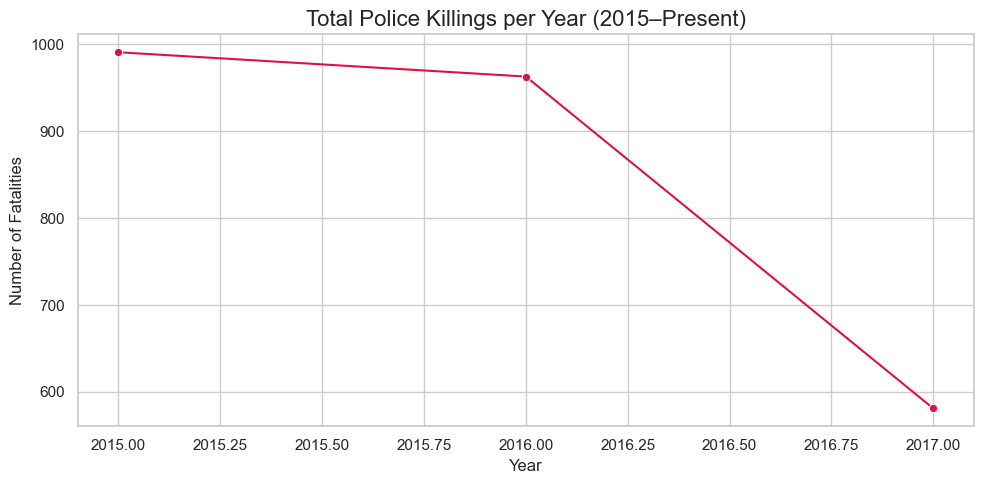

In [51]:
# Group by year to see long-term trend
yearly_killings = (
    df_time.groupby("year")
    .size()
    .reset_index(name="total_deaths")
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    x="year",
    y="total_deaths",
    data=yearly_killings,
    marker="o",
    color="crimson"
)

plt.title("Total Police Killings per Year (2015–Present)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()


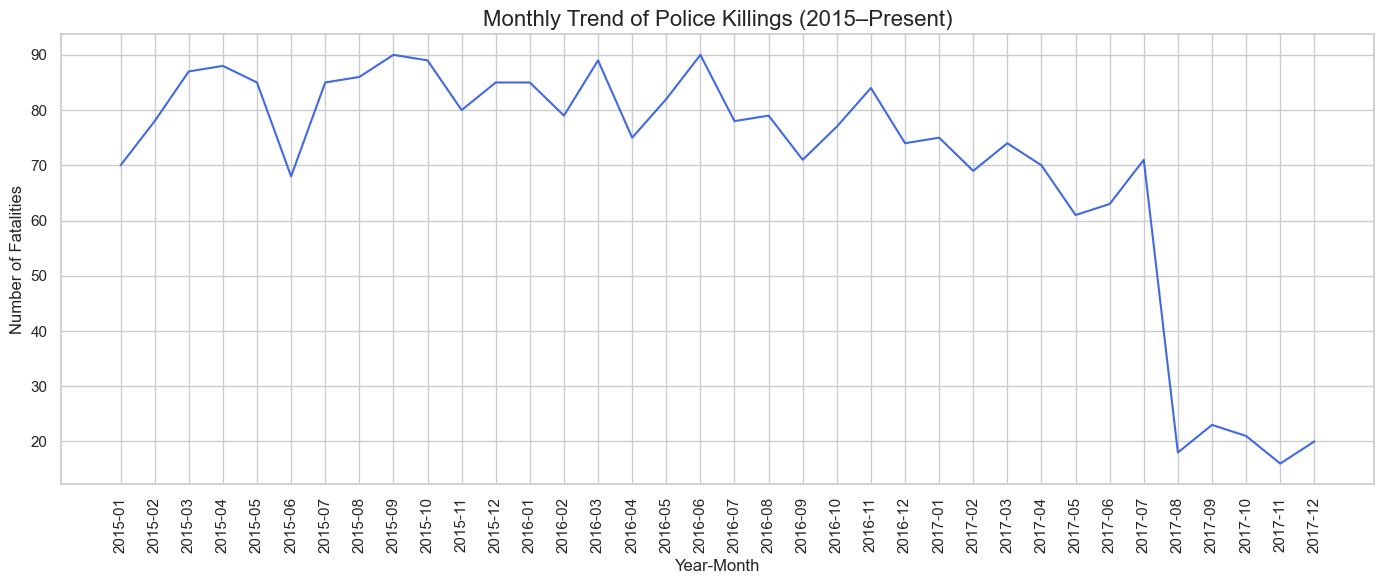

In [52]:
# Group by month (over all years) to view seasonality or patterns
monthly_killings = (
    df_time.groupby("year_month")
    .size()
    .reset_index(name="total_deaths")
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    x="year_month",
    y="total_deaths",
    data=monthly_killings,
    color="royalblue"
)
plt.xticks(rotation=90)
plt.title("Monthly Trend of Police Killings (2015–Present)", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()


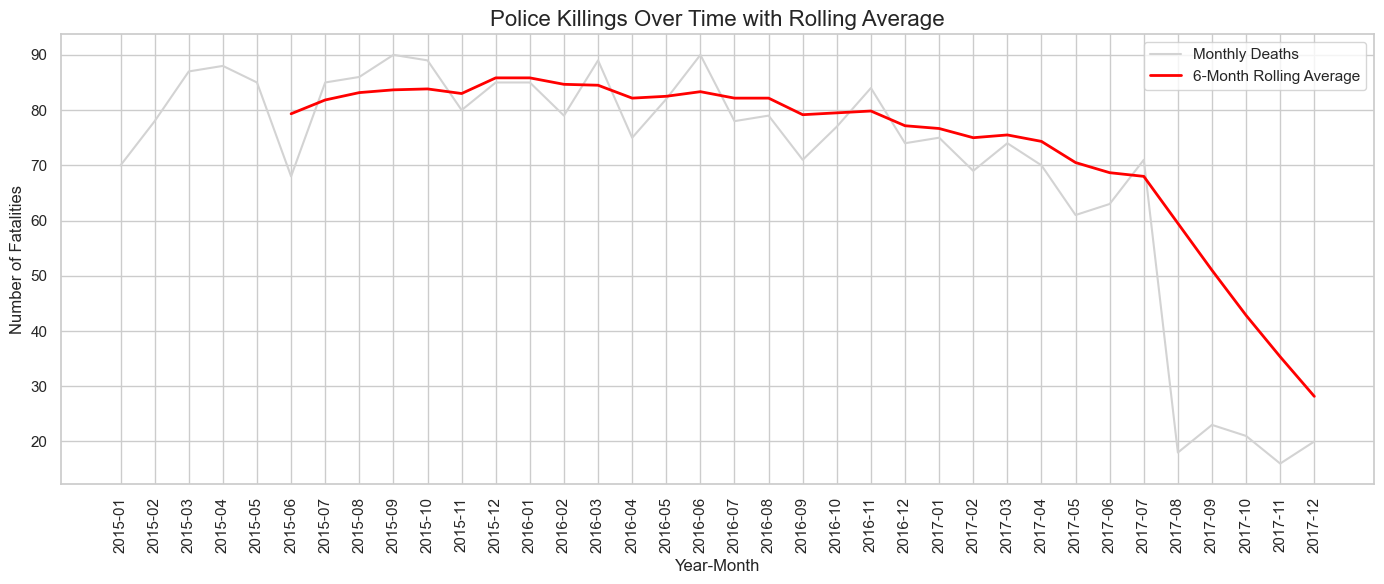

In [53]:
# Add a rolling average to smooth out noise and highlight trend

monthly_killings["rolling_avg"] = monthly_killings["total_deaths"].rolling(window=6).mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_killings["year_month"], monthly_killings["total_deaths"], label="Monthly Deaths", color="lightgray")
plt.plot(monthly_killings["year_month"], monthly_killings["rolling_avg"], label="6-Month Rolling Average", color="red", linewidth=2)

plt.xticks(rotation=90)
plt.title("Police Killings Over Time with Rolling Average", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Number of Fatalities")
plt.legend()
plt.tight_layout()
plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).